In [8]:
csv_file1 = 'Thunder_Acquisitions_wfm.csv'
csv_file2 = 'Thunder_Departures_wfm.csv'

In [1]:
from arcgis.gis import GIS
from arcgis.mapping import WebMap
empty_webmap = WebMap()

In [2]:
gis = GIS('http://slustl.maps.arcgis.com/home', 'wfmjr68')

Enter password: ········


In [3]:
usa_map = gis.map('USA', zoomlevel=3)
usa_map

MapView(basemaps=['dark-gray', 'dark-gray-vector', 'gray', 'gray-vector', 'hybrid', 'national-geographic', 'oc…

In [9]:
simple_renderer = {
  "renderer": {
    "type": "simple",
    "symbol": {
      "color": [
        0,
        0,
        128,
        128
      ],
      "size": 15,
      "angle": 0,
      "xoffset": 0,
      "yoffset": 0,
      "type": "esriSMS",
      "style": "esriSMSCircle",
      "outline": {
        "color": [
          0,
          0,
          128,
          255
        ],
        "width": 0.99975,
        "type": "esriSLS",
        "style": "esriSLSSolid"
      }
    }
  }
}

usa_map.add_layer(Thunder_Departures_wfm, simple_renderer)

NameError: name 'Thunder_Departures_wfm' is not defined

In [40]:
usa_map.add_layer(csv_layer1, {"renderer":"ClassedSizeRenderer", "field_name": "FromLocation"})
usa_map.add_layer(csv_layer2, {"renderer":"ClassedSizeRenderer", "field_name": "ToLocation"})

In [18]:
csv_item1 = gis.content.add({}, csv_file1)
csv_item2 = gis.content.add({}, csv_file2)

In [19]:
csv_item1, csv_item2

(<Item title:"Thunder_Acquisitions_wfm" type:CSV owner:wfmjr68>,
 <Item title:"Thunder_Departures_wfm" type:CSV owner:wfmjr68>)

In [20]:
csv_layer1 = csv_item1.publish(None, {"Address":"FromLocation"})
csv_layer2 = csv_item2.publish(None, {"Address":"ToLocation"})

In [22]:
empty_webmap.add_layer(csv_layer1, options={'title':'Thunder Acquisitions'})
empty_webmap.add_layer(csv_layer2, options={'title':'Thunder Departures'})

True

<Item title:"Thunder Basketball Player Transactions" type:Web Map owner:wfmjr68>
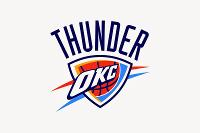

In [23]:
webmap_item_properties = {'title':'Thunder Basketball Player Transactions',
                         'snippet':'Map created using Python API showing locations of Thunder acquisitions and departures.',
                         'tags':['departures', 'acquisitions', 'Thunder', 'NBA', 'Basketball']}

empty_webmap.save(webmap_item_properties, thumbnail='http://www.hoops.co.il/wp-content/uploads/2018/08/thunder.jpg')